In [1]:
import time
import cv2
import os
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from estimator import *

In [3]:
model_path = "/Users/sedecim/Downloads/multi_person_mobilenet_v1_075_float.tflite"

stride = 16
threshold = 0.5
nmsr = 20
radius = 1
detection = 3

estimator = Estimator(stride,model_path,threshold,detection,nmsr,radius)

In [52]:
test_img = "/Users/sedecim/Code/创新项目/pose/MobilePose-pytorch/resources/5.png"
test_img = "/Users/sedecim/Downloads/timg-54.jpeg"
test_img = "/Users/sedecim/Downloads/dy_superman.jpg"
image = cv2.imread(test_img)

img_transposed = np.zeros(image.shape,"uint8");
img_transposed[:,:,0] = image[:,:,2]
img_transposed[:,:,1] = image[:,:,1]
img_transposed[:,:,2] = image[:,:,0]
image = img_transposed

# image = crop_image(image)

(fac,fitted_img) = resize_img(image)

poses = estimator.process_img(fitted_img,fac)


estimator.draw_pose_with_ease(max(poses),image)
# estimator.draw_poses(poses,image,-100)

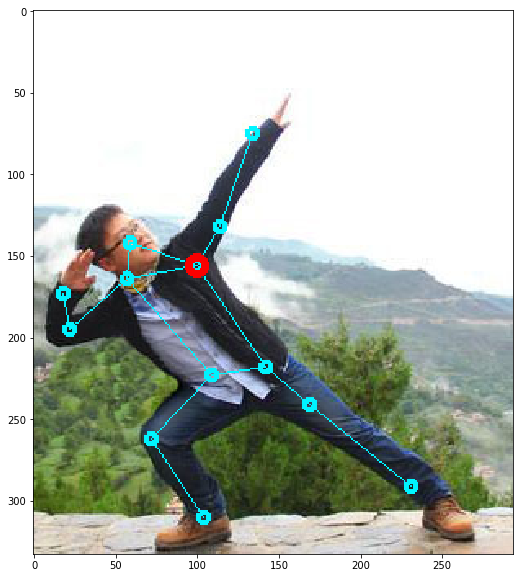

In [53]:
plt.figure(figsize = (10,10))
plt.imshow(image)

In [6]:
for p in poses:
    print(str(p))

Pose[-0.03365691093837514](with 17 parts)


In [7]:
str(max(poses))

'Pose[-0.03365691093837514](with 17 parts)'

In [8]:
from judge import judge

In [9]:
f_counts = 100
frames = []
for i in range(f_counts):
    strim = "kun_"+str(i)+".png"
    print(strim)
    image = cv2.imread(strim)
    
    img_transposed = np.zeros(image.shape,"uint8");
    img_transposed[:,:,0] = image[:,:,2]
    img_transposed[:,:,1] = image[:,:,1]
    img_transposed[:,:,2] = image[:,:,0]
    image = img_transposed
    
    frames.append(image)
    i += 1

kun_0.png
kun_1.png
kun_2.png
kun_3.png
kun_4.png
kun_5.png
kun_6.png
kun_7.png
kun_8.png
kun_9.png
kun_10.png
kun_11.png
kun_12.png
kun_13.png
kun_14.png
kun_15.png
kun_16.png
kun_17.png
kun_18.png
kun_19.png
kun_20.png
kun_21.png
kun_22.png
kun_23.png
kun_24.png
kun_25.png
kun_26.png
kun_27.png
kun_28.png
kun_29.png
kun_30.png
kun_31.png
kun_32.png
kun_33.png
kun_34.png
kun_35.png
kun_36.png
kun_37.png
kun_38.png
kun_39.png
kun_40.png
kun_41.png
kun_42.png
kun_43.png
kun_44.png
kun_45.png
kun_46.png
kun_47.png
kun_48.png
kun_49.png
kun_50.png
kun_51.png
kun_52.png
kun_53.png
kun_54.png
kun_55.png
kun_56.png
kun_57.png
kun_58.png
kun_59.png
kun_60.png
kun_61.png
kun_62.png
kun_63.png
kun_64.png
kun_65.png
kun_66.png
kun_67.png
kun_68.png
kun_69.png
kun_70.png
kun_71.png
kun_72.png
kun_73.png
kun_74.png
kun_75.png
kun_76.png
kun_77.png
kun_78.png
kun_79.png
kun_80.png
kun_81.png
kun_82.png
kun_83.png
kun_84.png
kun_85.png
kun_86.png
kun_87.png
kun_88.png
kun_89.png
kun_90.png
kun_91.pn

In [10]:
for i in range(len(frames)):
    frames[i] = crop_image(frames[i])

In [11]:
po = []

for f in frames:
    (fac,fit_img) = resize_img(f)
    poses = estimator.process_img(fit_img,fac)
    main_pose = max(poses)
    po.append(main_pose)

In [12]:
# cmp = []
# for p in po:
#     cmp.append(judge(po[7],p))

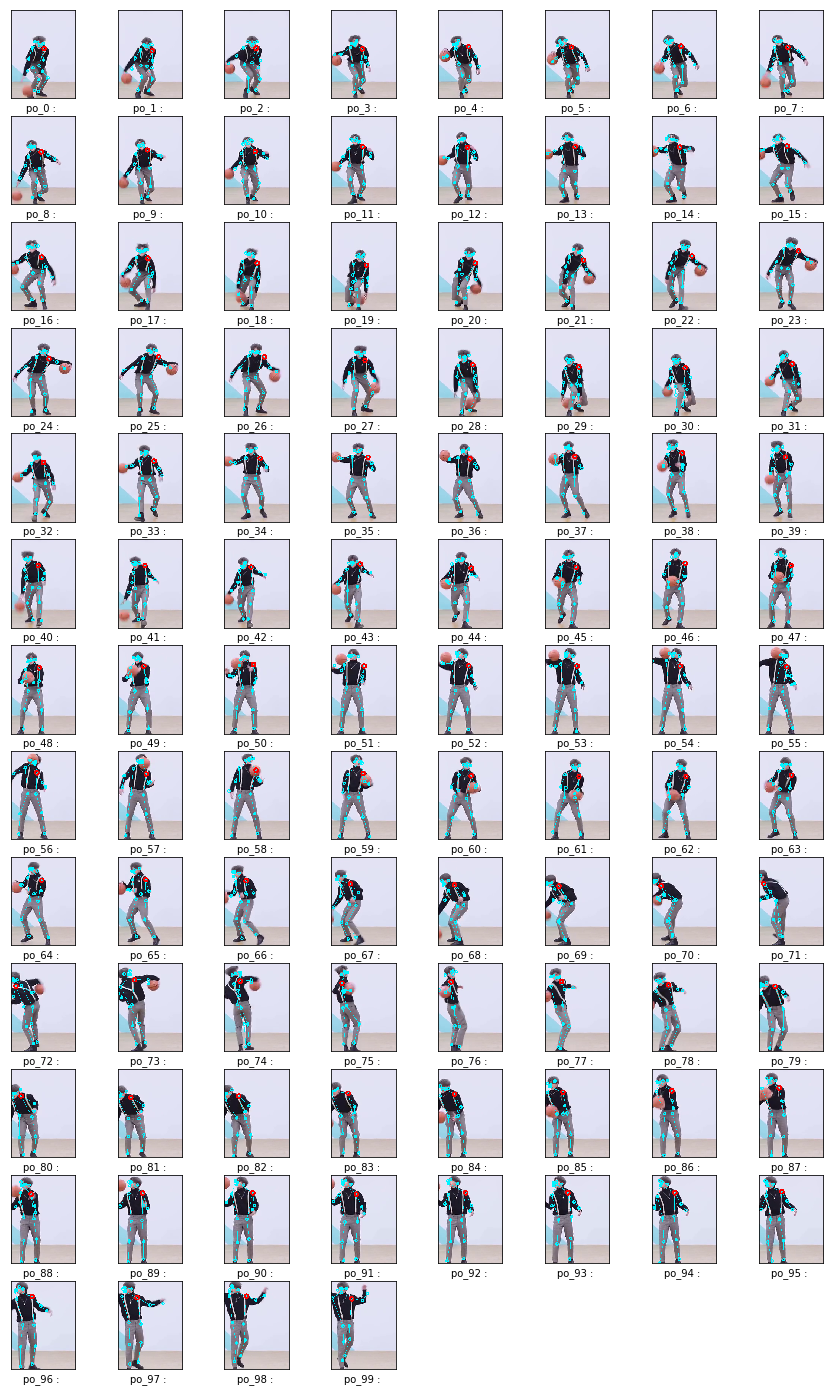

In [13]:
plt.figure(figsize=(15,25))
i = 1

pic_per_row = 8

for f in frames:
    plt.subplot(int(len(frames)/pic_per_row) + 1, pic_per_row , i )
    plt.xticks([])
    plt.yticks([])
    i += 1
    estimator.draw_pose(po[i-2],f,-100)
    plt.imshow(f)
    plt.xlabel("po_"  + str(i-2) + " : " )

In [14]:
def distance_vector(p1,p2):
    res = []
    points = [5,6,7,8,9,10,11,12,13,14,15]
    for i in points:
        k1 = p1.keypoints[i]
        k2 = p2.keypoints[i]
        if k1 != None and k2 != None:
            res.append(distance_squared(k1.pos, k2.pos))
        else:
            res.append(-1)
    return res

In [15]:
dists = [sum(distance_vector(po[i],po[37]))/11 for i in range(len(po)-1)]

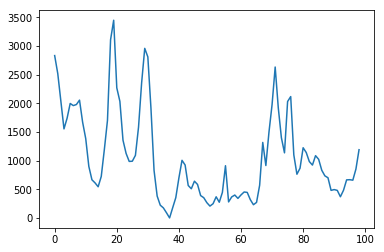

In [16]:
plt.plot(dists)

(array([14., 27., 19., 11.,  7., 11.,  3.,  2.,  3.,  2.]),
 array([   0.        ,  345.15454545,  690.30909091, 1035.46363636,
        1380.61818182, 1725.77272727, 2070.92727273, 2416.08181818,
        2761.23636364, 3106.39090909, 3451.54545455]),
 <a list of 10 Patch objects>)

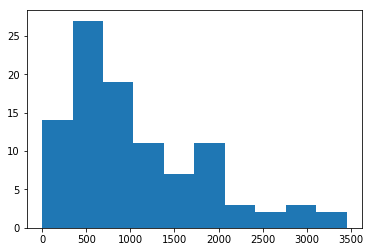

In [17]:
plt.hist(dists)

In [18]:
from judge import *

In [19]:
str(po[0])
str(po[0].keypoints[0])

'Keypoint<0,6.54047>(76, 97)'

In [20]:
vectorize(po[0])

[0.8221921916437787,
 0.5692099788303083,
 -0.9535826651341416,
 0.3011313679370973,
 1.0,
 0.0,
 -0.52999894000318,
 -0.847998304005088,
 0.7071067811865475,
 -0.7071067811865475,
 -0.9701425001453319,
 -0.24253562503633297,
 -0.06438227799796505,
 0.9979253089684582,
 -0.3070027799227584,
 0.9517086177605509,
 -0.09632419486019034,
 0.9953500135553002,
 -0.09053574604251853,
 0.9958932064677039,
 -0.29116161578269606,
 0.9566738804288585,
 0.036339618107142986,
 0.9993394979464321,
 0.5881716976750462,
 0.8087360843031886,
 0.4244338762307196,
 0.9054589359588684,
 -0.5749455167129004,
 0.818191696860666,
 -0.3713906763541038,
 0.9284766908852594,
 -0.8087360843031884,
 -0.5881716976750462,
 -0.9956342260592882,
 -0.09334070869305827,
 -0.9363291775690445,
 0.3511234415883917,
 0.9994865409003508,
 0.9755948726819355,
 0.9734347257986807,
 0.9399236484838975,
 -0.2667561246962095,
 -0.07948196445271027,
 0.3235344684927931,
 0.6830667322306573,
 -0.8087360843031884,
 -0.9956342260592

In [31]:
def qualify(vec):
    if(vec[44] >= 0.98 and vec[45] >= 0.98):
        return True
    else:
        return False

In [22]:
rec = []
for i in range(len(po)):
    try:
        vec = vectorize(po[i])
        if  qualify(vec):
            rec.append(i)
    except AttributeError as e:
        print(i)

In [23]:
str(po[71])

'Pose[0.2710965360913958](with 14 parts)'

In [24]:
len(rec)

61

In [25]:
len(frames)

100

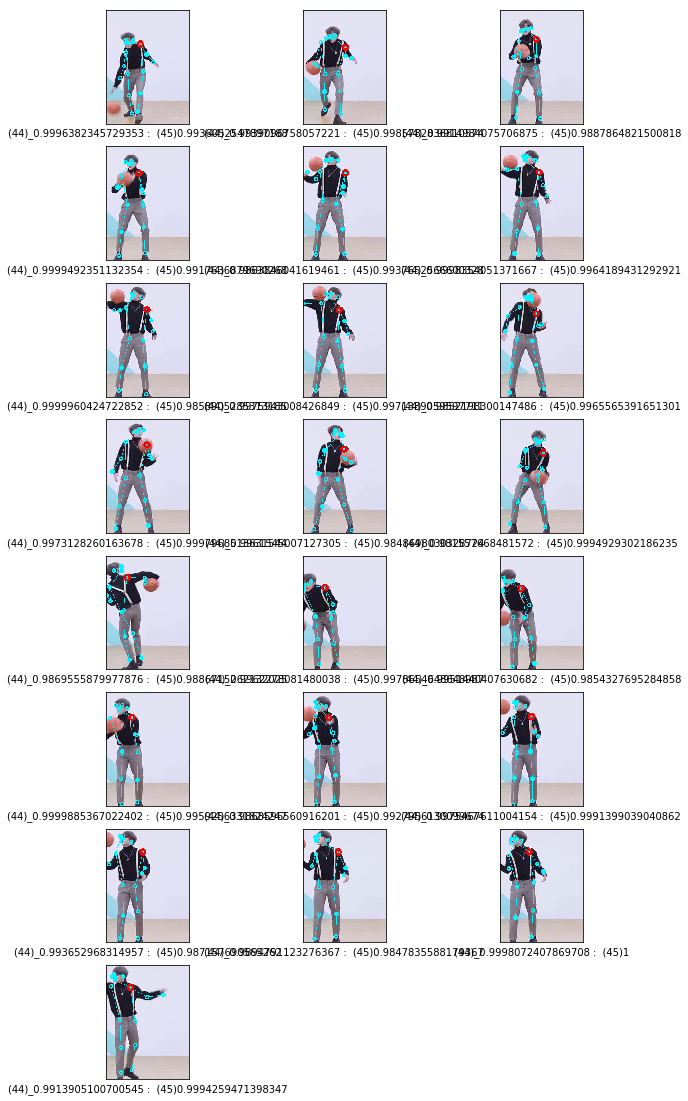

In [32]:
plt.figure(figsize=(10,100))

pic_per_row = 2
i = 1
for kk in range(len(po)):
    p = po[kk]
    vec = vectorize(p)
    if qualify(vec):
        plt.subplot(40,3, i )
        plt.xticks([])
        plt.yticks([])
        i += 1
    #     estimator.draw_pose(po[i-2],f,-100)
        plt.imshow(frames[kk])
        plt.xlabel("(44)_"  + str(vec[44]) + " :  (45)" + str(vec[45]) )

In [33]:
i

23